In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from sklearn.model_selection import train_test_split

Part 1

In [134]:
ad_df = pd.read_csv('/content/advertising.csv')
ad_df.head()

,Unnamed: 0,Unnamed: 0.1,TV,Radio,Newspaper,Sales
0,0,1,230.1,37.8,69.2,22.1
1,1,2,44.5,39.3,45.1,10.4
2,2,3,17.2,45.9,69.3,9.3
3,3,4,151.5,41.3,58.5,18.5
4,4,5,180.8,10.8,58.4,12.9


In [135]:
ad_df.drop(['Unnamed: 0'], axis=1, inplace=True)
ad_df.rename(columns={'Unnamed: 0.1': 'S.no'}, inplace=True)
ad_df.head()

,S.no,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [136]:
ad_df.columns

Index(['S.no', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

Q1) Draw (a) a scatter plot of money spent on TV advertisements versus sales (b) Pair plots and 
Heatmap.


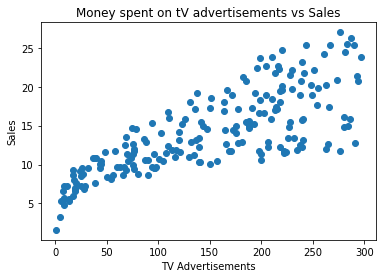

In [137]:
plt.scatter(ad_df['TV'], ad_df['Sales'])
plt.title("Money spent on tV advertisements vs Sales")
plt.xlabel("TV Advertisements")
plt.ylabel("Sales")
plt.show()

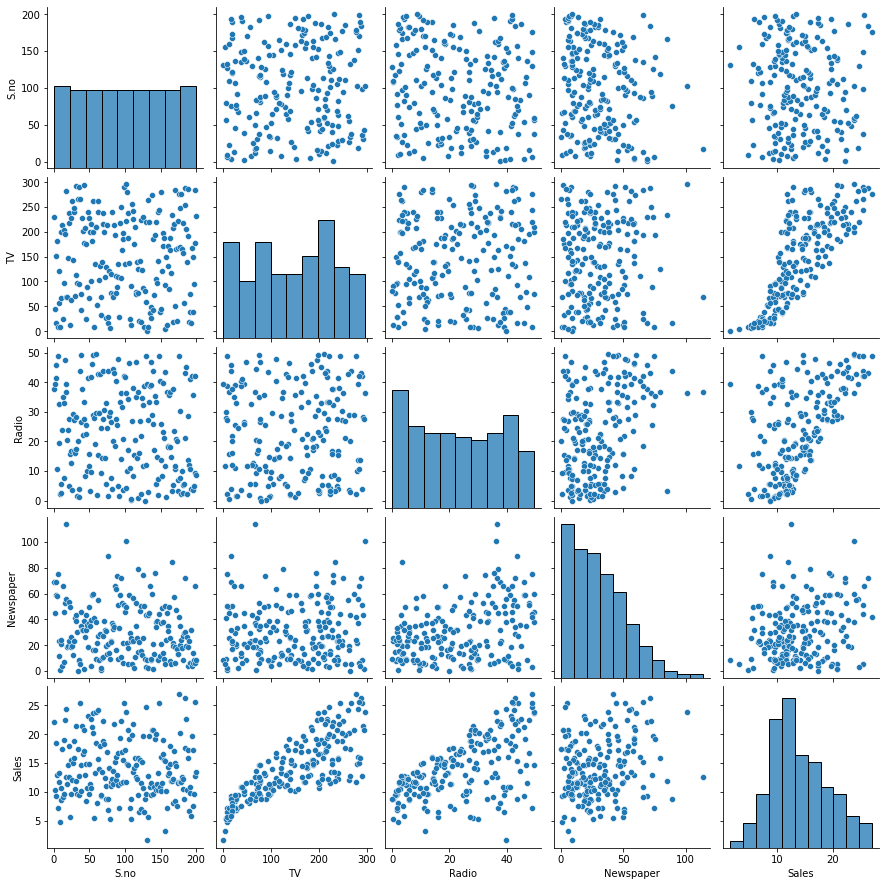

In [138]:
sns.pairplot(ad_df)
plt.show()

Text(0.5, 1.0, 'Correlation matrix')

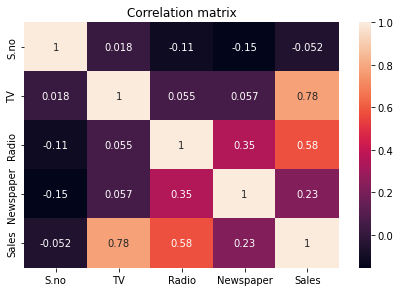

In [139]:
sns.heatmap(ad_df.corr(), annot=True)
plt.tight_layout()
plt.title("Correlation matrix")

Q2) Develop a Linear Regression model based on money spent on TV advertisements versus Sales.

In [140]:
data = ad_df['TV']
target = ad_df['Sales']

In [141]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=1)
X_train.shape, X_test.shape

((140,), (60,))

In [142]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(np.array(X_train).reshape(-1, 1), y_train)

LinearRegression()

In [143]:
print(lr.coef_, lr.intercept_)

[0.04812204] 6.923519536059553


Q3) With the regression line so developed, predict the sales that can be anticipated based on the 
money spent on TV advertisements.

In [144]:
y_predict = lr.predict(np.array(X_test).reshape(-1, 1))
y_predict

array([17.06764591, 16.66823297, 11.52879892, 20.4073156 , 19.1368937 ,
       20.57093054, 14.78184893, 15.62398466, 10.32093567, 17.2890073 ,
       14.83959538, 10.25356482, 17.25532187, 12.20731971, 17.78947654,
       12.97246017, 13.26119242, 20.91259704,  8.1554438 , 17.06283371,
       11.75497252, 10.18619396,  8.13138278, 12.09182681, 12.35649804,
       15.98971218,  8.99757953, 18.89628349, 14.95027608, 18.47762173,
       18.46799732, 18.2081383 , 14.12738917, 15.11389102, 18.87703468,
       15.82128503, 17.62586159, 13.15051172, 17.35637816,  7.86671155,
        7.55391828, 11.2737521 ,  7.82340171, 16.74522823,  7.27481044,
       14.01189627, 10.68666319, 17.89534503, 16.78853807, 17.96752809,
       20.864475  , 12.84734286,  7.85708714, 15.71060434, 19.70473379,
       14.89252963, 17.43818563,  8.12657058, 18.0926454 ,  8.99276733])

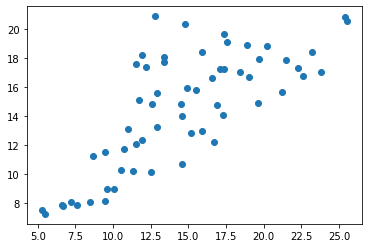

In [145]:
plt.scatter(y_test, y_predict)
plt.show()

In [146]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(f'Mean Squared Error: {mean_squared_error(y_test, y_predict)}')
print(f'Mean absolute Error: {mean_absolute_error(y_test, y_predict)}')
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_predict))}')

Mean Squared Error: 10.571057434656955
Mean absolute Error: 2.548375850318048
Root Mean Squared Error: 3.251316261863333


Q4) Draw the Regression Line superimposing on the data.

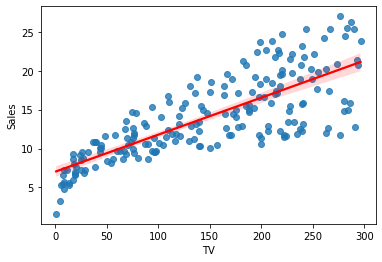

In [147]:
sns.regplot(x='TV', y='Sales', data=ad_df, line_kws={'color':'r'})
plt.show()

Q5). Employ statsmodels.api and run an OLS regressor on the data. Plot the line of regression and 
residuals employing libraries of statsmodel. Comment on the heteroscedasticity.

In [148]:
lr_model = ols("Sales ~ TV", data=ad_df).fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.47e-42
Time:                        11:07:16   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

In [149]:
fig = plt.figure(figsize=(14, 8))

<Figure size 1008x576 with 0 Axes>

In [150]:
fig = sm.graphics.plot_regress_exog(lr_model, 'TV', fig=fig)

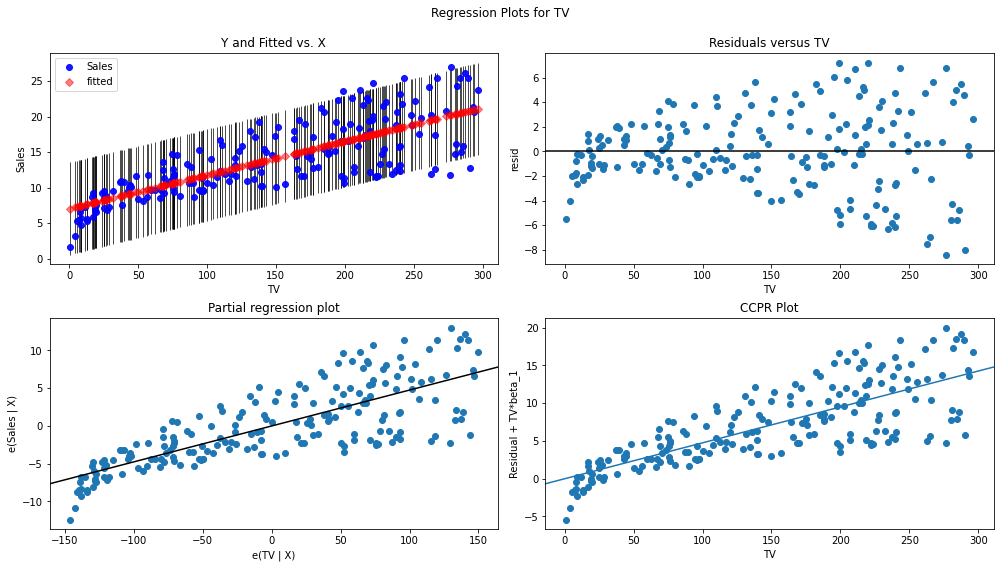

In [151]:
fig

Since the points are spread uniformly across the residual line horizontally and not based on one side, we can say that the predictor variable 'TV' is not heteroscedastic.

Part 2

Q1)Import the data set, describe the data and save it on your hard drive. Split the data for training 
and testing in the ratio of 80:20.

In [152]:
diab_df = pd.read_csv('/content/pima-indians-diabetes.csv', names=['Pregnancies', 'Glucose', 'Blood Pressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesFunction', 'Age', 'Class'])
diab_df.head()

,Pregnancies,Glucose,Blood Pressure,SkinThickness,Insulin,BMI,DiabetesFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [153]:
diab_df.to_csv('/content/diabetes.csv')

In [154]:
inputs = diab_df.drop(['Class'], axis=1)
target = diab_df.Class

In [165]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2)

Q2) Employ the standard scalar library and rescale the distribution of values so that the mean of 
observed values is 0 and the standard deviation is 1.

In [166]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Q3) Develop a KNN classifier model and predict for the test data.

In [167]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [168]:
y_pred = knn_model.predict(X_test)

In [169]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

Q4)  Draw up a confusion matrix.

In [173]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cm

array([[86, 20],
       [22, 26]])

Text(33.0, 0.5, 'Actual Value')

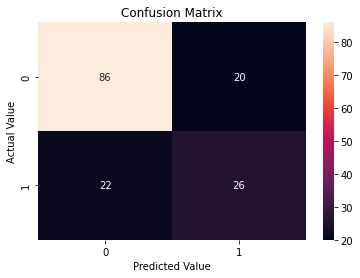

In [174]:
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

In [175]:
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.7272727272727273


In [176]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       106
           1       0.57      0.54      0.55        48

    accuracy                           0.73       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.72      0.73      0.73       154



Q5) Identify an optimum k value based on minimum mean errors (consider a range of 20). Draw a 
corresponding graph between Mean error and k-value.

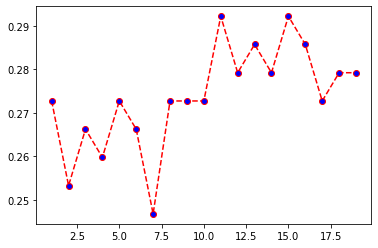

In [172]:
from sklearn.neighbors import KNeighborsClassifier
error = []
for i in range(1, 20):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred = knn.predict(X_test)
  error.append(np.mean(y_test != pred))
plt.plot(range(1, 20), error, 'k--', color='r', marker='o', markerfacecolor='b')
plt.show()